In [1]:
# import libraries
library(ggplot2)
suppressPackageStartupMessages(suppressWarnings(library(ggridges))) # ridgeline plots

In [2]:
# adding the file path probability file
proba_path <- file.path("../../../results/3.jump_analysis/JUMP_injury_proba.csv.gz")

# loading in probability file path
proba_df <- read.table(proba_path, head = TRUE, sep=",")

# replacing True and False to shuffled to non shuffled
proba_df$shuffled_model <- ifelse(proba_df$shuffled_model == "False", "Not Shuffled", 
                                      ifelse(proba_df$shuffled_model == "True", "Shuffled", proba_df$shuffled_model))
# displaying
print(dim(proba_df))
head(proba_df)

[1] 1169880       4


,shuffled_model,pred_injury,injury_type,proba
,<chr>,<chr>,<chr>,<dbl>
1,Not Shuffled,Kinase,Control,3.485574e-13
2,Not Shuffled,Kinase,Control,1.077476e-08
3,Not Shuffled,Kinase,Control,1.379263e-06
4,Not Shuffled,Ferroptosis,Control,4.254261e-09
5,Not Shuffled,Kinase,Control,8.860754e-07
6,Not Shuffled,Kinase,Control,3.600769e-08


In [3]:
# showing the unique injuries
unique(proba_df$injury_type)

[1] "Control"              "Cytoskeletal"         "Hsp90"               
 [4] "Kinase"               "Genotoxin"            "Miscellaneous"       
 [7] "Redox"                "HDAC"                 "mTOR"                
[10] "Proteasome"           "Saponin"              "Mitochondria"        
[13] "Ferroptosis"          "Tannin"               "Nonspecific reactive"

Picking joint bandwidth of 0.00551

Picking joint bandwidth of 0.0027

Picking joint bandwidth of 0.00278

Picking joint bandwidth of 0.00526

Picking joint bandwidth of 0.00422

Picking joint bandwidth of 0.0028

Picking joint bandwidth of 0.00456

Picking joint bandwidth of 0.00364

Picking joint bandwidth of 0.00309

Picking joint bandwidth of 0.00393

Picking joint bandwidth of 0.00382

Picking joint bandwidth of 0.00353

Picking joint bandwidth of 0.00389

Picking joint bandwidth of 0.00449

Picking joint bandwidth of 0.00344

Picking joint bandwidth of 0.00767

Picking joint bandwidth of 0.00827

Picking joint bandwidth of 0.00813

Picking joint bandwidth of 0.00898

Picking joint bandwidth of 0.0138

Picking joint bandwidth of 0.0119

Picking joint bandwidth of 0.00922

Picking joint bandwidth of 0.00938

Picking joint bandwidth of 0.0118

Picking joint bandwidth of 0.00559

Picking joint bandwidth of 0.00909

Picking joint bandwidth of 0.0105

Picking joint bandwidth of 0.0108


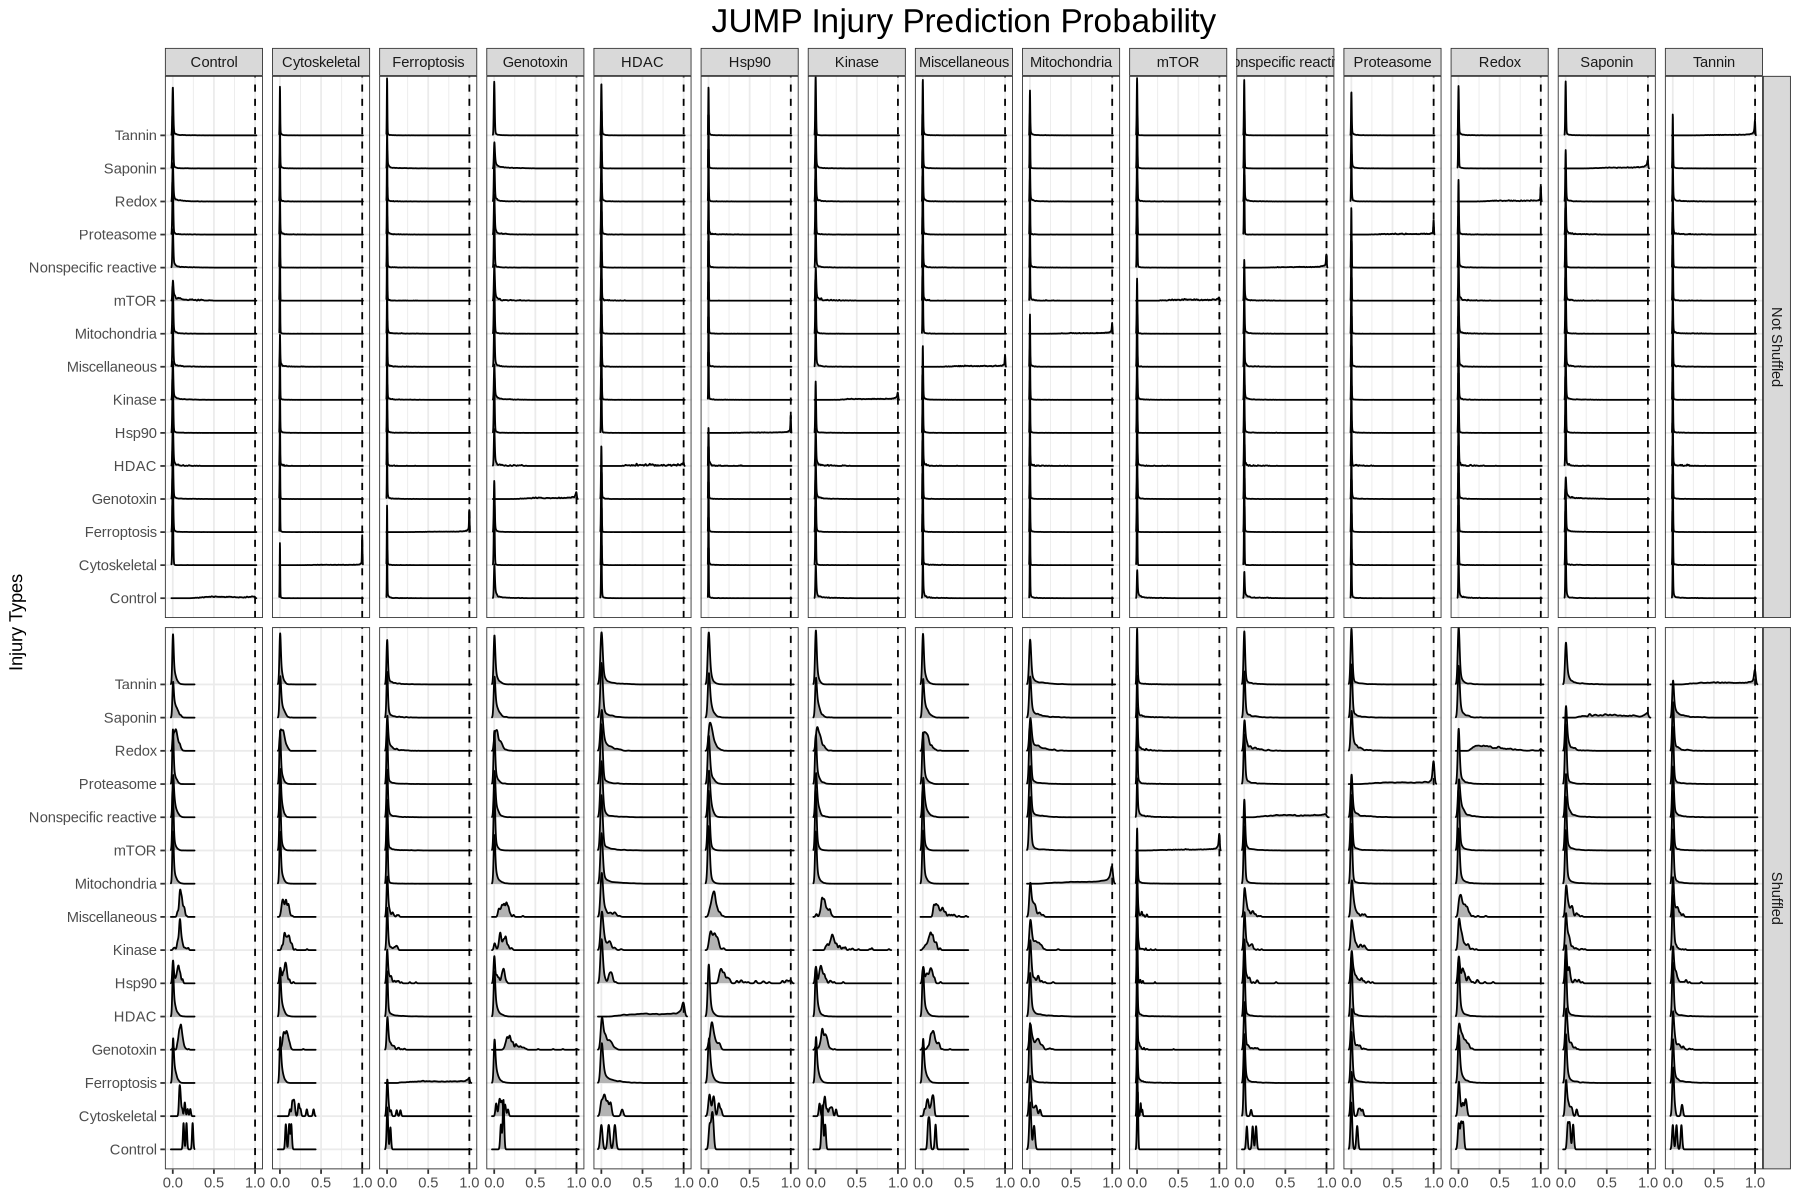

In [4]:
# image size
img_height <- 10
img_width <- 15

options(repr.plot.width = img_width, repr.plot.height = img_height)
ridge_plot <- (
    ggplot(proba_df, aes(x = proba, y = pred_injury)) +
    geom_density_ridges() +
    facet_grid(shuffled_model~injury_type, scales = "free_y") +
    geom_vline(xintercept = 1, linetype = "dashed", color = "black") +
    scale_x_continuous(breaks = seq(0, 1, 0.5)) +
    labs(title = "JUMP Injury Prediction Probability", y = "Injury Types", x = "Probability") +
    theme_bw() +

    # no legend
    theme(plot.title = element_text(size = 20, hjust = 0.5)) +

    # remove x axis label
    theme(axis.title.x = element_blank())
    )
ridge_plot

ggsave(filename = "JUMP_cell_injury_facet_proba.png", height = img_height, width = img_width)
